Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.utils import class_weight
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D,Flatten, Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.callbacks import Callback, EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg16 import VGG16
import os
import cv2

Data Paths

In [2]:
bengin_path = "Dataset 1/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung cancer dataset/Bengin cases"
malignant_path = "Dataset 1/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung cancer dataset/Malignant cases"
normal_path = "Dataset 1/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung cancer dataset/Normal cases"

DataFrame Preparation

In [3]:
image_classes = ["Bengin cases", "Malignant cases", "Normal cases"]
pc_path_list = [bengin_path, malignant_path, normal_path]

In [4]:
img_path = []
class_labels = []
for i, dir_list in enumerate(pc_path_list):
    name_img = os.listdir(dir_list)
    for name_file in name_img:
        img = os.path.join(dir_list,name_file)
        img_path.append(img)
        class_labels.append(image_classes[i])

df = pd.DataFrame({"image_path" : img_path,
                  "image_label" : class_labels})

df.head(50)

,image_path,image_label
0,Dataset 1/The IQ-OTHNCCD lung cancer dataset/T...,Bengin cases
1,Dataset 1/The IQ-OTHNCCD lung cancer dataset/T...,Bengin cases
2,Dataset 1/The IQ-OTHNCCD lung cancer dataset/T...,Bengin cases
3,Dataset 1/The IQ-OTHNCCD lung cancer dataset/T...,Bengin cases
4,Dataset 1/The IQ-OTHNCCD lung cancer dataset/T...,Bengin cases
5,Dataset 1/The IQ-OTHNCCD lung cancer dataset/T...,Bengin cases
6,Dataset 1/The IQ-OTHNCCD lung cancer dataset/T...,Bengin cases
7,Dataset 1/The IQ-OTHNCCD lung cancer dataset/T...,Bengin cases
8,Dataset 1/The IQ-OTHNCCD lung cancer dataset/T...,Bengin cases
9,Dataset 1/The IQ-OTHNCCD lung cancer dataset/T...,Bengin cases


Data Visualization

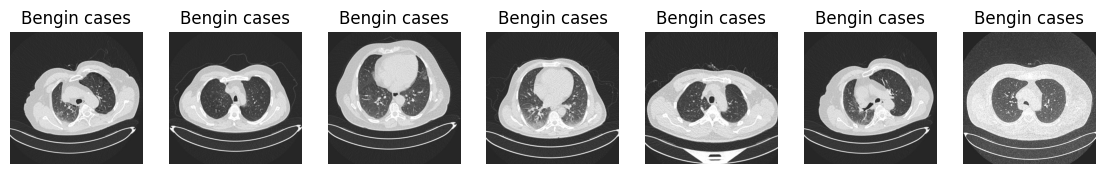

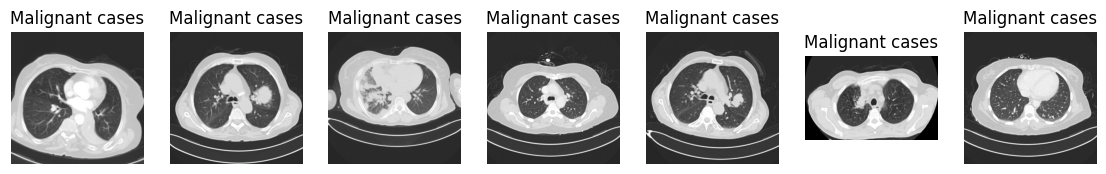

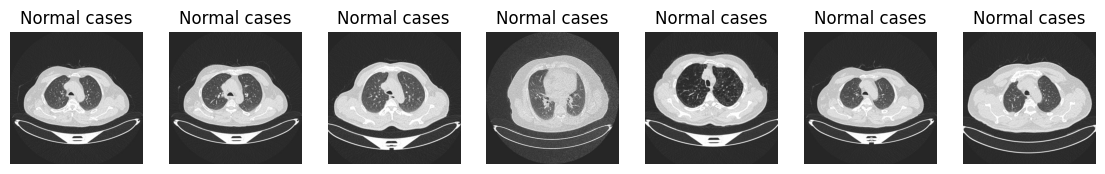

In [5]:
for category, group in df.groupby("image_label"):
    fig, ax = plt.subplots(1,7, figsize = (14,14))
    ax = ax.ravel()
    for i, (_,r) in enumerate(group.sample(7).iterrows()):
        img = cv2.imread(r.image_path)
        ax[i].imshow(img)
        ax[i].axis("off")
        ax[i].set_title(r.image_label)
    plt.show()

In [6]:
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

In [7]:
countData = df["image_label"].value_counts().reset_index()
fig = px.histogram(data_frame = countData, x = "image_label", y="count")
fig.show()

In [8]:
sizes = []
resol = []
color_allocations = []

for img_path in df["image_path"]:
    #load image
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    #Get image size
    size = os.path.getsize(img_path)
    sizes.append(size)
    #Extract the resolution of images
    resolution = img.shape[:2]
    resol.append(resolution)
    #Extract color distribution
    mean_color_distributions = np.bincount(img.flatten(), minlength = 256)
    color_allocations.append(mean_color_distributions)
sizes = np.array(sizes)
resol = np.array(resol)
color_allocations = np.array(color_allocations)

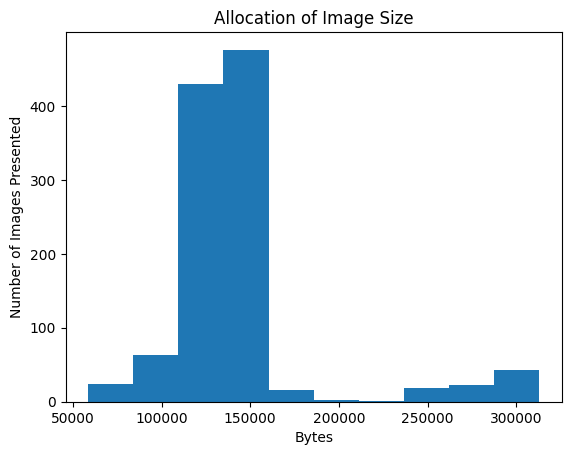

In [9]:
plt.hist(sizes)
plt.title("Allocation of Image Size")
plt.xlabel("Bytes")
plt.ylabel("Number of Images Presented")
plt.show()

In [10]:
#Sizes in MB
sizes_MB = []
for image_path in df["image_path"]:
    #load image
    img = cv2.imread(image_path)
    #Get image size
    size = os.path.getsize(image_path)
    sizes_MB.append(size/1_000_000)
    
fig = px.histogram(x=sizes_MB, nbins = 50, title = "Allocation of Image Sizes")
fig.update_layout(xaxis_title = "File Size (MB)",
                 yaxis_title = "Number of Images Presented",
                 showlegend = False,
                 bargap = 0.1,
                 bargroupgap = 0.1)
fig.update_traces(marker = dict(color = "blue"))
fig.show()

Preparing Data for the clients

In [11]:
train_ratio = 0.50

df_c1, df_c2 = train_test_split(df, train_size = train_ratio, random_state = 42)

print(f"Data shape = {df_c1.shape}")

Data shape = (548, 2)


In [12]:
print(f"Data shape = {df_c2.shape}")

Data shape = (549, 2)


In [39]:
Df1=pd.DataFrame(df_c1)
Df1.to_csv("Dataset 2\Client1_Data.csv",index=False)
Df2=pd.DataFrame(df_c1)
Df2.to_csv("Dataset 2\Client2_Data.csv", index=False)